#NURAL 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

In [4]:
# Load and encode target
df = pd.read_csv('cleaned_dataset.csv')
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Default': 1})

# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split into train and test BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit-transform only on training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

Training model with 400 epochs and batch size 32...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 400 epochs and batch size 48...
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 400 epochs and batch size 64...
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training model with 600 epochs and batch size 32...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 600 epochs and batch size 48...
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training model with 600 epochs and batch size 64...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training model with 800 epochs and batch size 32...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training model with 800 epochs and batch size 48...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training model with 800 epochs and batch size 64...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


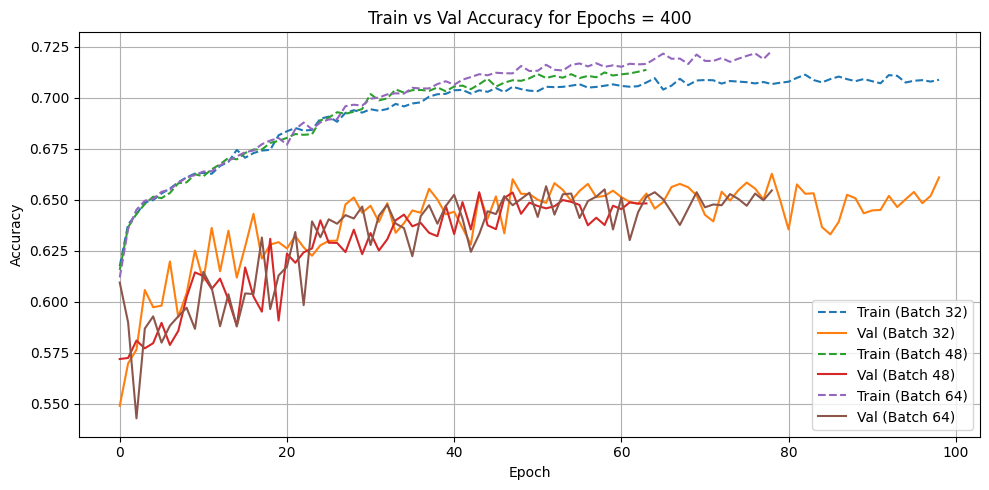

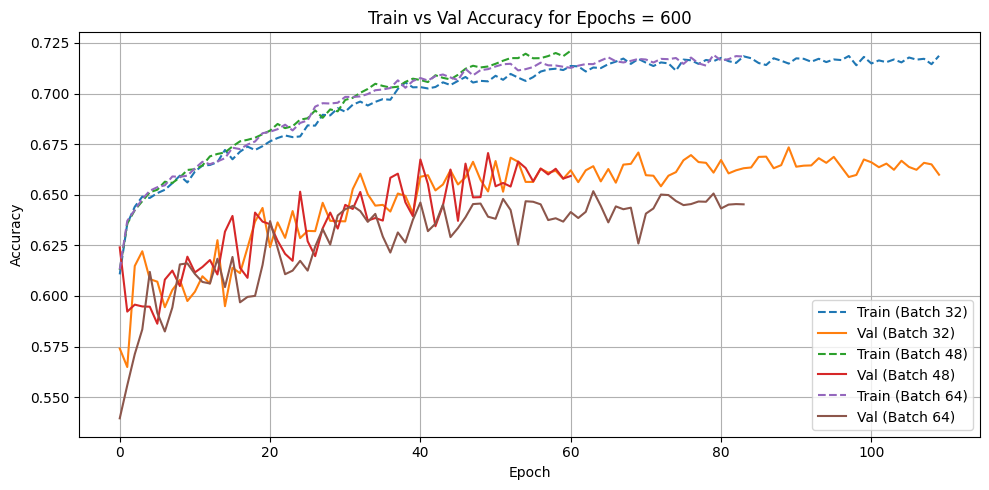

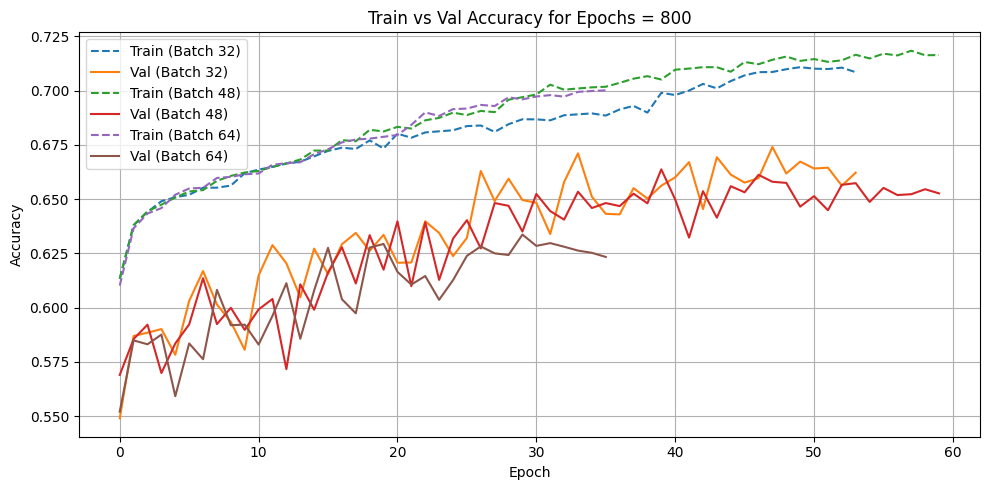

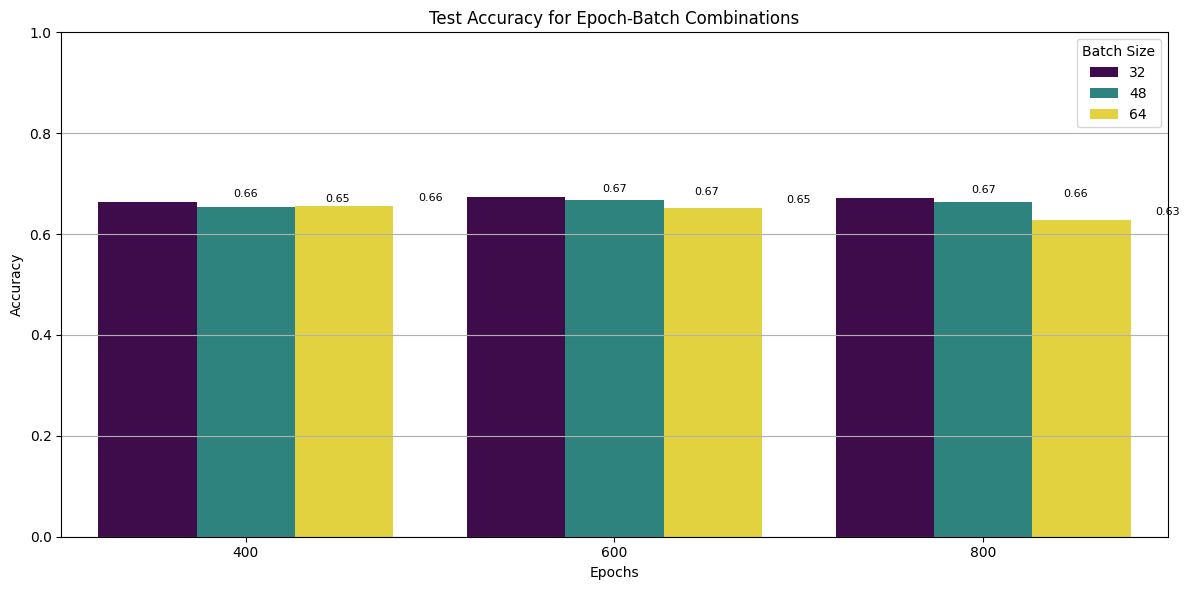

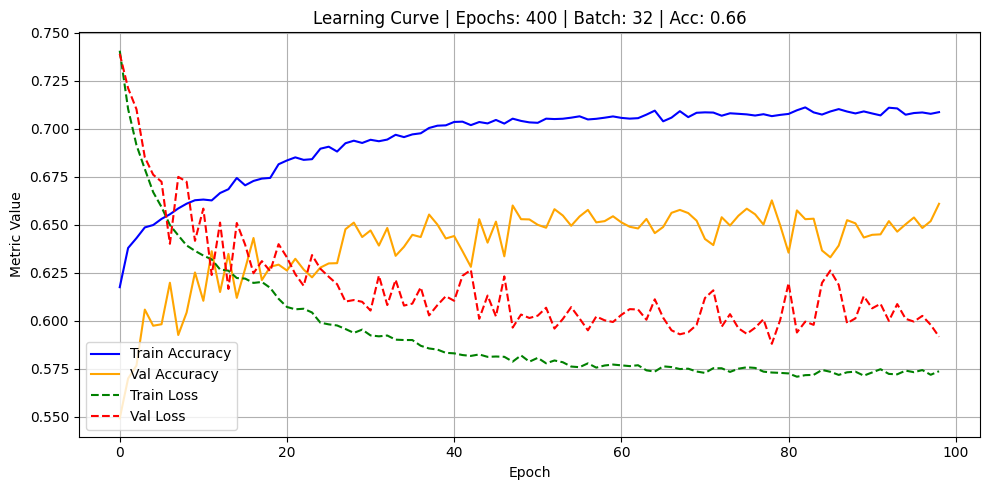

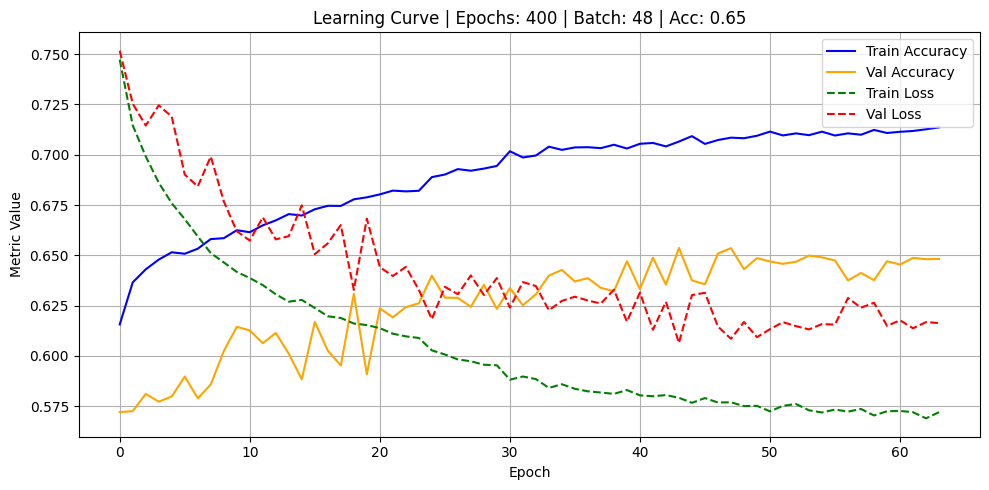

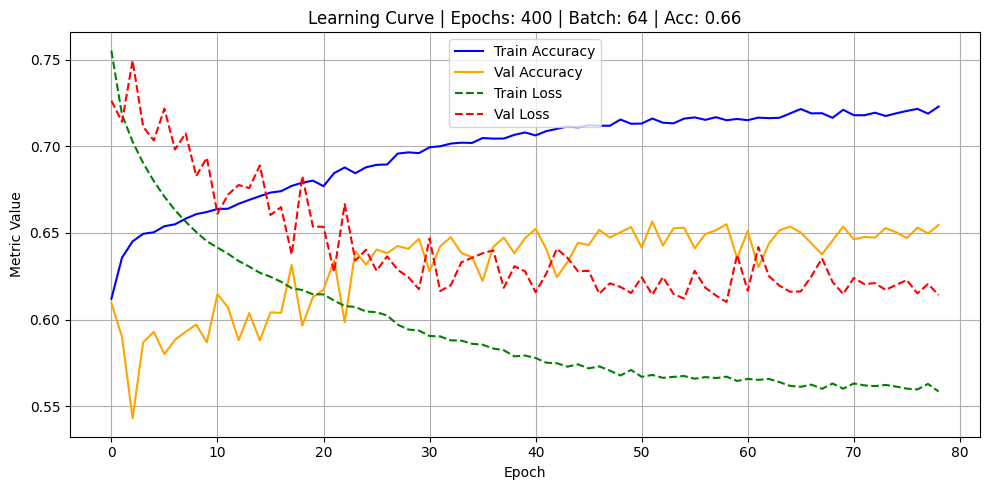

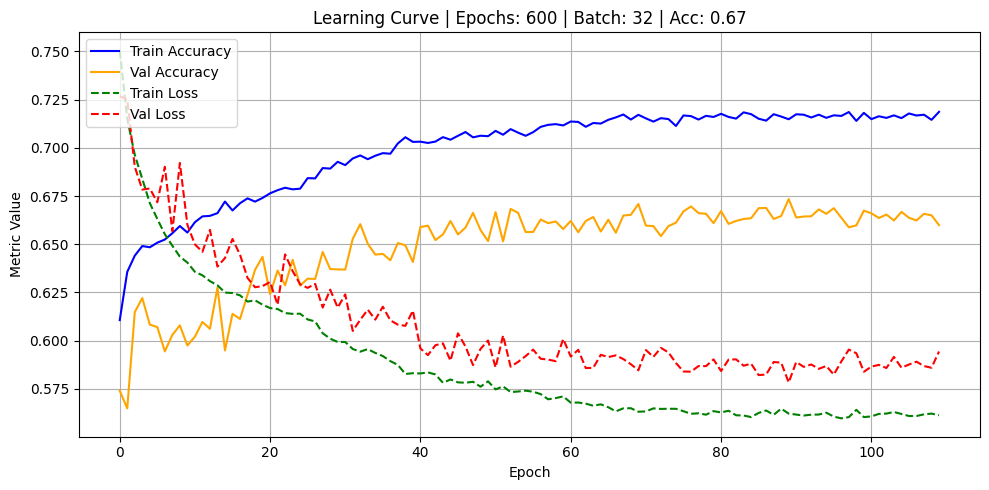

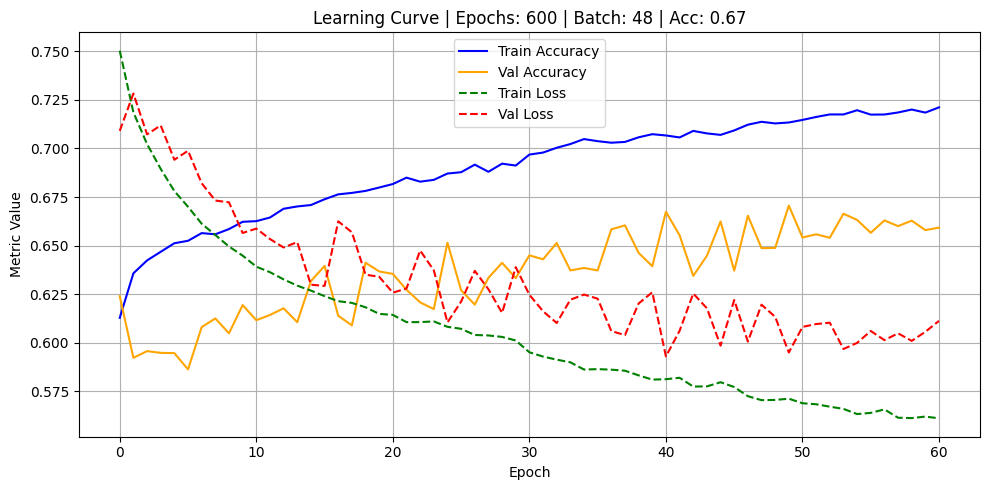

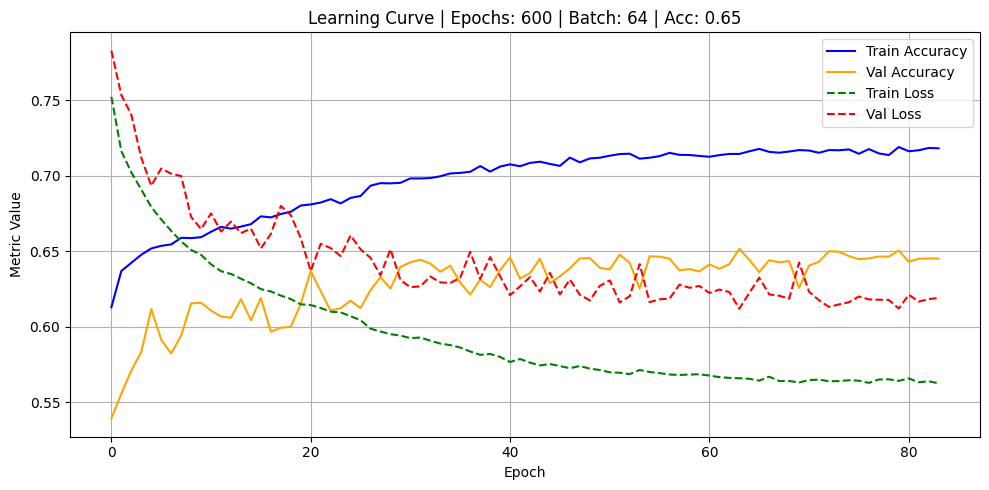

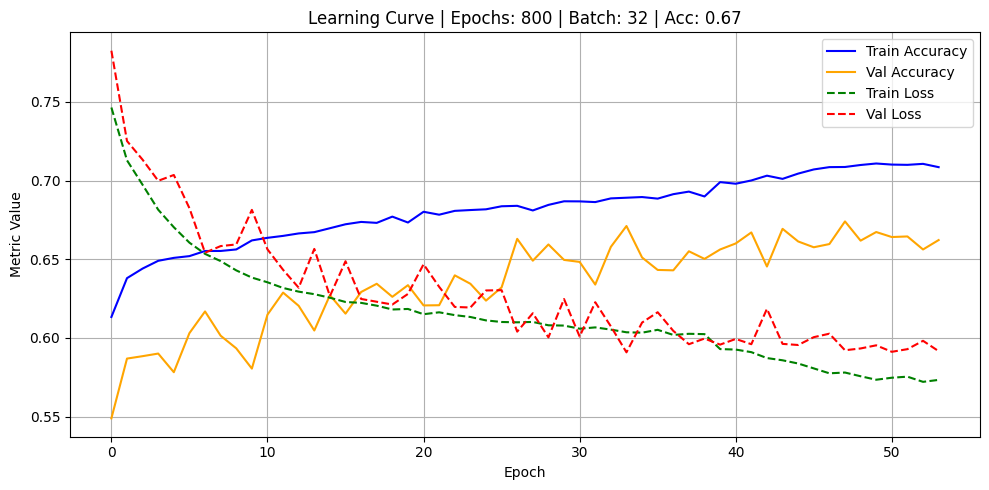

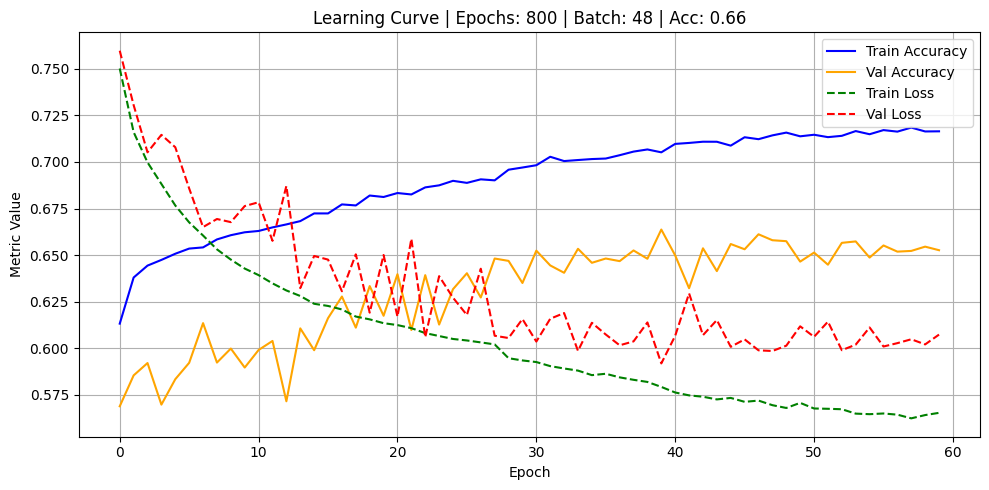

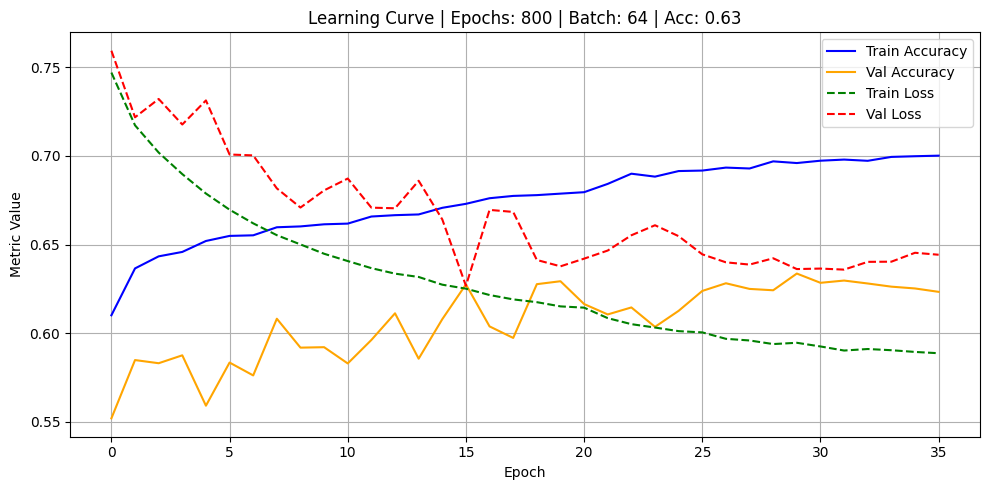


🏆 Best Model: Epochs = 600, Batch Size = 32, Accuracy = 0.6734
📁 Saved at: saved_models/model_epochs600_batch32_acc0.673.h5


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Prepare data
X_train_data = X_train_balanced
y_train_data = y_train_balanced
X_test_data = X_test_transformed
y_test_data = y_test

# Parameters
training_epochs = [400, 600, 800]
batch_sizes = [32, 48, 64]
results = []

os.makedirs("saved_models", exist_ok=True)

# Class weights
classes = np.unique(y_train_data)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_data)
class_weight_dict = dict(zip(classes, class_weights))

# Training Loop
for epochs in training_epochs:
    for batch in batch_sizes:
        print(f"Training model with {epochs} epochs and batch size {batch}...")

        model = Sequential([
            Dense(256, input_dim=X_train_data.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(1e-4)),
            BatchNormalization(),
            ReLU(),
            Dropout(0.4),

            Dense(128, kernel_initializer='he_normal', kernel_regularizer=l2(1e-4)),
            BatchNormalization(),
            ReLU(),
            Dropout(0.3),

            Dense(64, kernel_initializer='he_normal', kernel_regularizer=l2(1e-4)),
            BatchNormalization(),
            ReLU(),
            Dropout(0.2),

            Dense(32, kernel_initializer='he_normal', kernel_regularizer=l2(1e-4)),
            BatchNormalization(),
            ReLU(),

            Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.0005),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

        history = model.fit(
            X_train_data, y_train_data,
            validation_data=(X_test_data, y_test_data),
            epochs=epochs,
            batch_size=batch,
            class_weight=class_weight_dict,
            callbacks=[early_stop, lr_reduce],
            verbose=0
        )

        predictions = model.predict(X_test_data)
        predicted_classes = (predictions > 0.5).astype(int).flatten()
        acc = accuracy_score(y_test_data, predicted_classes)

        model_name = f"model_epochs{epochs}_batch{batch}_acc{acc:.3f}.h5"
        model_path = os.path.join("saved_models", model_name)
        model.save(model_path)

        results.append((epochs, batch, acc, model_path, history))

# -----------------------------------------------------
# 📊 Graph 1: Train vs Test Accuracy for each epoch per batch size
unique_epochs = sorted(set(e for e, _, _, _, _ in results))
for epoch_val in unique_epochs:
    plt.figure(figsize=(10, 5))
    for e, b, _, _, hist in results:
        if e == epoch_val:
            plt.plot(hist.history['accuracy'], label=f'Train (Batch {b})', linestyle='--')
            plt.plot(hist.history['val_accuracy'], label=f'Val (Batch {b})', linestyle='-')
    plt.title(f"Train vs Val Accuracy for Epochs = {epoch_val}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------
# 📊 Graph 2: Bar Chart - Accuracy for All (Epoch, Batch) Combos
df_result = pd.DataFrame([(e, b, acc) for e, b, acc, _, _ in results], columns=['Epochs', 'Batch Size', 'Accuracy'])
plt.figure(figsize=(12, 6))
sns.barplot(data=df_result, x='Epochs', y='Accuracy', hue='Batch Size', palette='viridis')

# Annotate accuracy on each bar
for i in range(len(df_result)):
    row = df_result.iloc[i]
    plt.text(i // len(batch_sizes) + (i % len(batch_sizes)) * 0.25,
             row['Accuracy'] + 0.01,
             f"{row['Accuracy']:.2f}",
             ha='center', fontsize=8)

plt.title("Test Accuracy for Epoch-Batch Combinations")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(title="Batch Size")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 📈 Graph 3: Learning Curves (Train/Val Accuracy & Loss)
for epochs, batch, acc, model_path, history in results:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
    plt.plot(history.history['loss'], label='Train Loss', color='green', linestyle='--')
    plt.plot(history.history['val_loss'], label='Val Loss', color='red', linestyle='--')
    plt.title(f"Learning Curve | Epochs: {epochs} | Batch: {batch} | Acc: {acc:.2f}")
    plt.xlabel("Epoch")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------
# 🏆 Best Model
best_model = max(results, key=lambda x: x[2])
best_epochs, best_batch, best_acc, best_path, _ = best_model
print(f"\n🏆 Best Model: Epochs = {best_epochs}, Batch Size = {best_batch}, Accuracy = {best_acc:.4f}")
print(f"📁 Saved at: {best_path}")


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import joblib


df = pd.read_csv('cleaned_dataset.csv')
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Default': 1})

X = df.drop('loan_status', axis=1)
y = df['loan_status']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



import os

# Prepare lists to store results
training_accuracies = [50, 100, 150, 200]
batch_sizes = [16, 32, 48, 64]
results = []

# Create directory to store models
os.makedirs("saved_models", exist_ok=True)

# Iterate over all combinations
for epochs in training_accuracies:

    for batch in batch_sizes:
        print(f"Training model with {epochs} epochs and batch size {batch}...")

        # Rebuild the model for each run
        model = Sequential()
        model.add(Dense(128, input_shape=(X_train_transformed.shape[1],), activation='relu', kernel_regularizer=l2(1e-4)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-4)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-4)))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0)

        history = model.fit(X_train_transformed, y_train,
                            validation_data=(X_test_transformed, y_test),
                            epochs=epochs, batch_size=batch,
                            callbacks=[early_stop, lr_reduce],
                            verbose=0)

        # Predict and evaluate
        predictions = model.predict(X_test_transformed)
        predicted_classes = (predictions > 0.5).astype(int).flatten()
        acc = accuracy_score(y_test, predicted_classes)

        # Store result
        model_name = f"model_epochs{epochs}_batch{batch}.h5"
        model_path = f"saved_models/{model_name}"
        model.save(model_path)
        results.append((epochs, batch, acc, model_path, history))

# Plot accuracies
plt.figure(figsize=(12, 6))
labels = [f"{e}-{b}" for e, b, _, _, _ in results]
accuracies = [acc for _, _, acc, _, _ in results]
bars = plt.bar(labels, accuracies, color='skyblue')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{acc:.2f}", ha='center', va='bottom')
plt.ylabel("Accuracy")
plt.title("Test Accuracy for Different Epoch-Batch Size Combinations")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot learning curves
for epochs, batch, acc, model_path, history in results:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"Learning Curve (Epochs: {epochs}, Batch: {batch}, Acc: {acc:.2f})")
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Identify best model
best_model = max(results, key=lambda x: x[2])
best_epochs, best_batch, best_acc, best_path, _ = best_model
print(f"🏆 Best Model: Epochs = {best_epochs}, Batch Size = {best_batch}, Accuracy = {best_acc:.4f}")
print(f"📁 Saved at: {best_path}")
test_error_sound("error.mp3")